# Section 2.4: Error Analysis for Iterative Methods

## Comparing Linear vs. Quadratic Convergence 

In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Example: Comparing Linear and Quadratic Convergence

**Definition**: Assume $\lbrace p_n\rbrace_{n = 0}^\infty$ converges to $p$.  If positive (finite) constants $\alpha$ and $\lambda$ exists such that $$\lim_{n\to\infty} \frac{\left\vert p_{n+1}-p\right\vert}{\left\vert p_n-p\right\vert^\alpha} = \lambda,$$ then we say that $\lbrace p_n\rbrace_{n = 0}^\infty$ converges to $p$ with order $\alpha$, and asymptotic error constant $\lambda$.  


The sequences $\lbrace p_n\rbrace$ and $\lbrace q_n\rbrace$ where $$p_n = 2^{-n}, \qquad q_n = 2^{-2^n-1}$$ both converge to $0$ as $n \to \infty$.  However, they converge with different orders.  The following loop calculates and displays the iterates $p_n$ and $q_n$ for $n = 0, 1, \ldots, 5$


In [6]:
N = 5;

print("  n  |   p_n = 2^(-n)  |  q_n = 2^(-2^(n) - 1)")
print("================================================")


for n in range(0, N+1):
    p=(1/2.)**n
    q = (1/2.)**(2**(n)-1)
    print("%3d  |   %10.5e   |    %10.5e" % (n,p,q))

  n  |   p_n = 2^(-n)  |  q_n = 2^(-2^(n) - 1)
  0  |   1.00000e+00   |    1.00000e+00
  1  |   5.00000e-01   |    5.00000e-01
  2  |   2.50000e-01   |    1.25000e-01
  3  |   1.25000e-01   |    7.81250e-03
  4  |   6.25000e-02   |    3.05176e-05
  5  |   3.12500e-02   |    4.65661e-10


Now, let's visualize this convergence rate.  Since we know the explicit formulae for the sequences $\lbrace p_n\rbrace$ and $\lbrace q_n\rbrace$, we can create arrays using `numpy`'s `arange` command.  

In [15]:
n = np.arange(0,N+1)
p = (1/2.)**n
q = (1/2.)**(2**n-1)
print(n)
print(p)
print(q)

[0 1 2 3 4 5]
[ 1.       0.5      0.25     0.125    0.0625   0.03125]
[  1.00000000e+00   5.00000000e-01   1.25000000e-01   7.81250000e-03
   3.05175781e-05   4.65661287e-10]


Now, let's plot the values of the two sequences as a function of $n$.  Note, both sequences go to zero.  However, from the graph, you can see that $q_n$ goes to zero faster than $p_n$.  

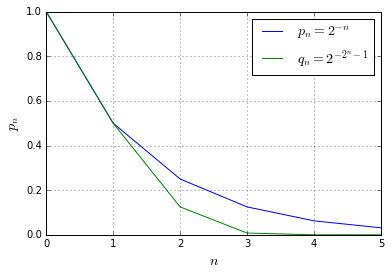

In [19]:
plt.plot(n,p)
plt.plot(n,q)
plt.grid()
plt.legend(["$p_n = 2^{-n}$","$q_n = 2^{-2^n-1}$"],fontsize=14)
plt.xlabel("$n$",fontsize=14)
plt.ylabel("$p_n$",fontsize=14)
plt.show()


We can see the order of convergence via a `log`-`log'' plot.  For example, if for large $n$, we know that 
$$\frac{\left\vert p_{n+1}-p\right\vert}{\left\vert p_n-p\right\vert^\alpha} \approx \lambda,$$ then, we see that $$\ln\left\vert p_{n+1}-p\right\vert \approx \alpha \ln\left\vert p_{n}-p\right\vert + \ln(\lambda)$$

We will treat $\ln\left\vert p_{n+1}-p\right\vert$ as our $y$ variable, and $\ln\left\vert p_{n+1}-p\right\vert$ as our $x$ variable. The code
```
xp = np.log(np.abs(p[0:-2] - 0))
```
creates a vector that contains $p_0, p_1, \ldots, p_{N-1}$ where $N$ is the last iterate that we calculated.  It is worth noting the notation `p[0:-2]`.  Python indexes from $0$, so that `p[0]` is the first entry in the array `p`.  The notation `p[-1]` represents the last entry in the array.  So using `p[0:-2]` returns an array containing the first entry through the second-to-last.

Likewise, we can create `yp = np.log(np.abs(p[1:-1]-0))` and use `plt.plot(xp,yp)` to visualize the convergence rates.  

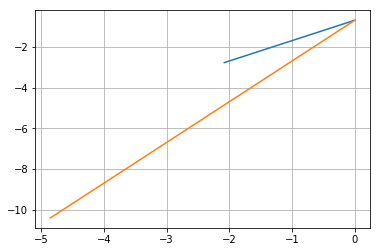

In [92]:
xp = np.log(np.abs(p[0:-2] - 0))
yp = np.log(np.abs(p[1:-1] - 0))

plt.plot(np.log(p[0:-2]),np.log(p[1:-1]))
plt.plot(np.log(abs(pp[0:-2])),np.log(abs(pp[1:-1])))
plt.grid()

In [93]:
Y = np.log(pp)